In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [6]:
df_limpo = df.dropna()

In [7]:
df_limpo = df_limpo.assign(work_year = df_limpo['work_year'].astype('int64'))

In [8]:
df_limpo.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df_limpo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Experiencia'}, xlabel='experience_level'>

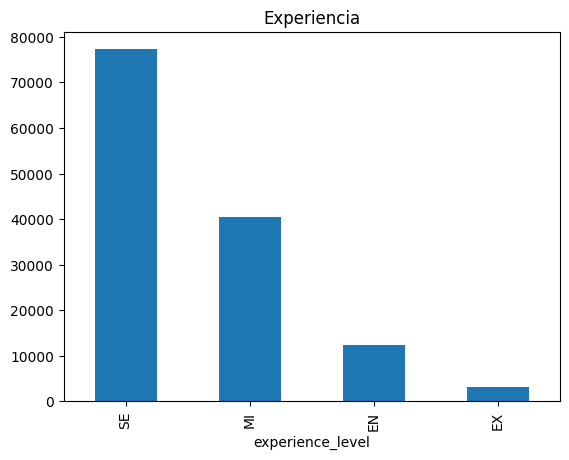

In [ ]:
df_limpo['experience_level'].value_counts().plot(kind='bar', title="Experiencia")

In [11]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

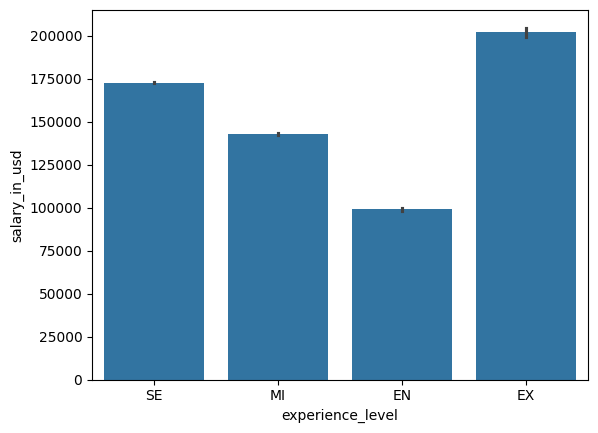

In [ ]:
sns.barplot(data = df_limpo, x = 'experience_level', y = 'salary_in_usd')

In [ ]:
import matplotlib.pyplot as plt

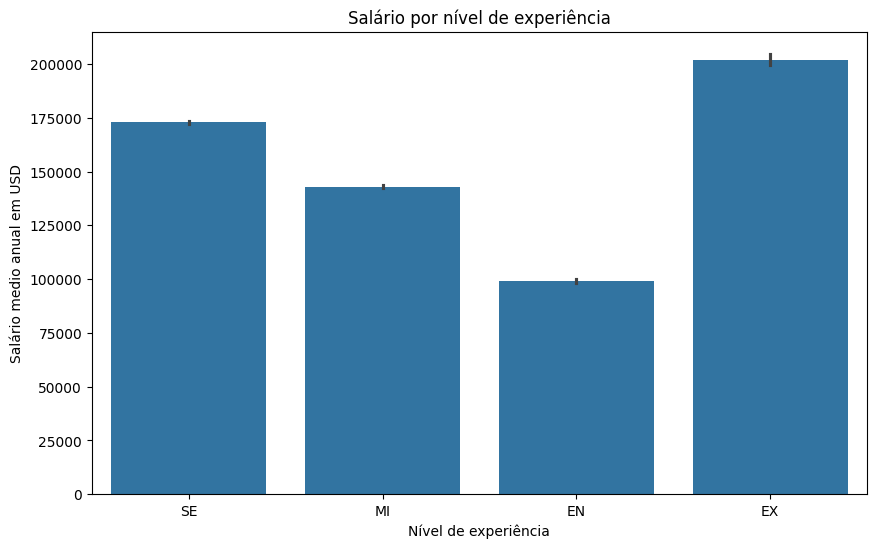

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df_limpo, x = 'experience_level', y = 'salary_in_usd')
plt.title('Salário por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário medio anual em USD')
plt.show()

In [ ]:
df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

,salary_in_usd
experience_level,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [ ]:
ordem = df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).index

In [ ]:
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='experience_level')

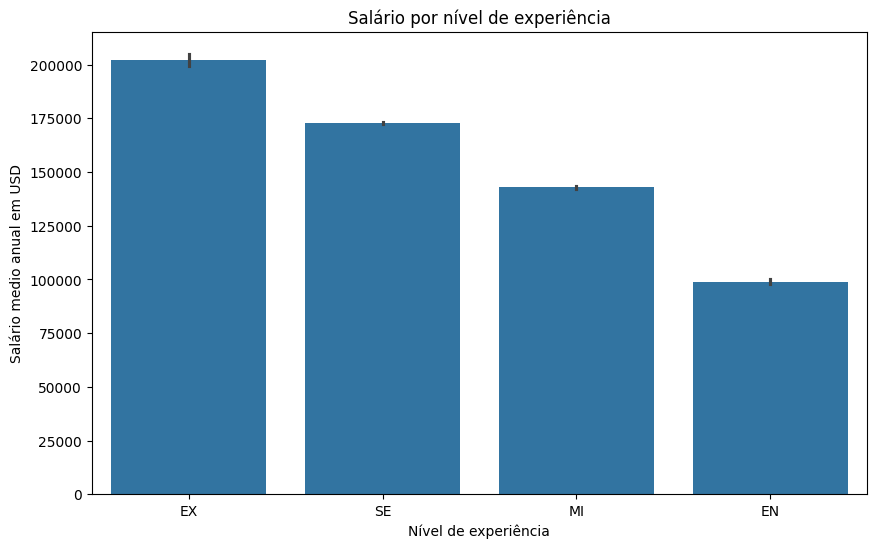

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df_limpo, x = 'experience_level', y = 'salary_in_usd', order=ordem)
plt.title('Salário por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário medio anual em USD')
plt.show()

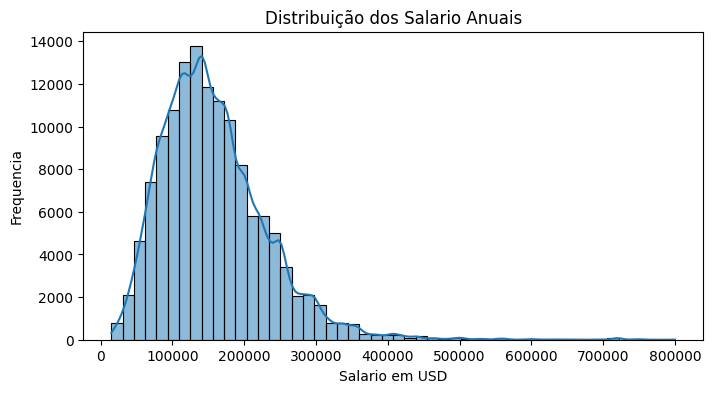

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['salary_in_usd'], bins = 50, kde = True)
plt.title('Distribuição dos Salario Anuais')
plt.xlabel('Salario em USD')
plt.ylabel('Frequencia')
plt.show()

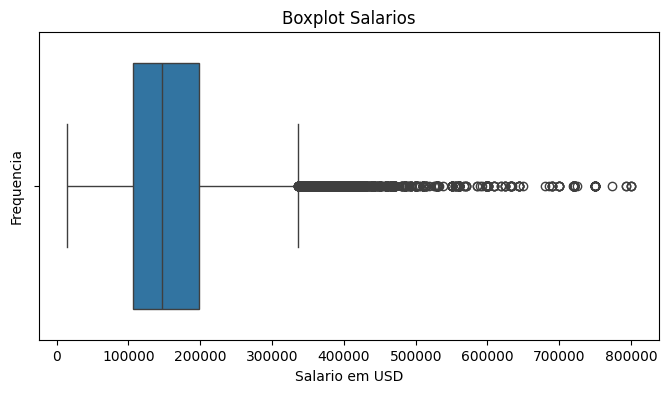

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x = df_limpo['salary_in_usd'])
plt.title('Boxplot Salarios')
plt.xlabel('Salario em USD')
plt.ylabel('Frequencia')
plt.show()

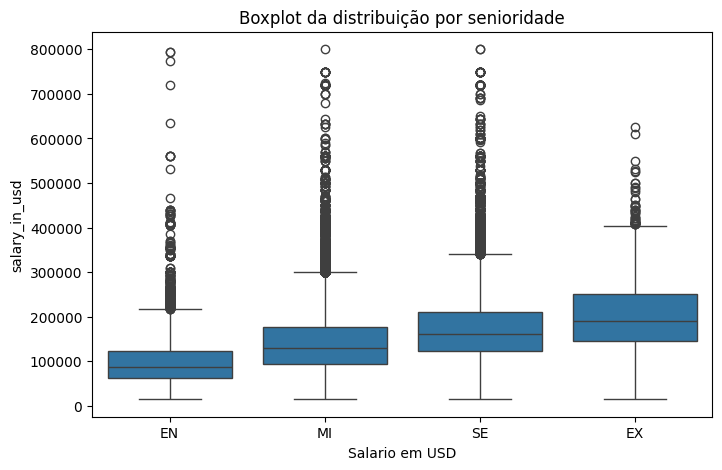

In [ ]:
ordem_senioridade = ['EN', 'MI', 'SE', 'EX']
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = df_limpo, order = ordem_senioridade)
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salario em USD')
plt.show()

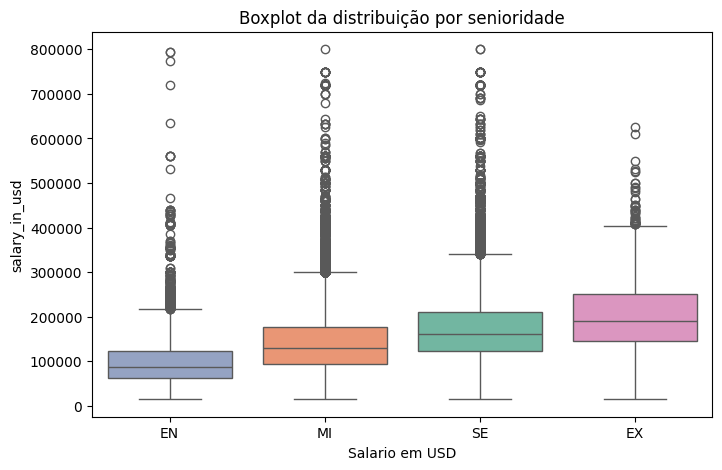

In [ ]:
ordem_senioridade = ['EN', 'MI', 'SE', 'EX']
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = df_limpo, order = ordem_senioridade, palette = 'Set2', hue = 'experience_level')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salario em USD')
plt.show()

In [10]:
import plotly.express as px

In [ ]:
senioridade_media_salario = df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()


fig = px.bar(senioridade_media_salario,
             x='experience_level',
             y='salary_in_usd',
             title='Média de Salário por Nível de Experiência',
             labels = {'experience_level': 'Nivel de Experiência', 'salary_in_usd': 'Media Salarial Anual {USD}'})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Distribuição de trabalho remoto')
fig.show()

In [ ]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Distribuição de trabalho remoto',
             hole = 0.5)
fig.show()

In [ ]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Distribuição de trabalho remoto',
             hole = 0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

In [2]:
pip install pycountry

In [12]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['employee_residence'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['job_title'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salary_in_usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salary_in_usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'salary_in_usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()
